# Генерація звуків

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile
from IPython.display import display, Audio
from scipy.io import wavfile

### Загальні налаштування і функції

In [188]:
SAMPLING_RATE = 44100  #частота дискретизації
freq = 200             #частота звуку
length = 4             #довжина генерованих файлів у секундах

clock_ticks = np.arange(0, SAMPLING_RATE*length, 1)       #розбиття проміжку на точки часу

def oscilator(frequency, amplitude):
    '''
    Функція, що генерує звукову хвилю заданої в аргументі частоти
    та множника амплітуди (1 - максимальна, 0 - мінімальна)
    '''
    return (np.sin(np.pi*2*frequency/SAMPLING_RATE*clock_ticks)*32767*amplitude).astype(np.int16)

def plot_signal(signal, steps = SAMPLING_RATE/20):
    '''
    Функція, що виводить графік сигналу
    '''
    plt.plot(np.arange(0, len(signal), 1), signal)
    if steps:
        plt.xlim(0, steps)
    plt.hlines(0, 0, len(signal), color='red')


#### Генерація синусоїди

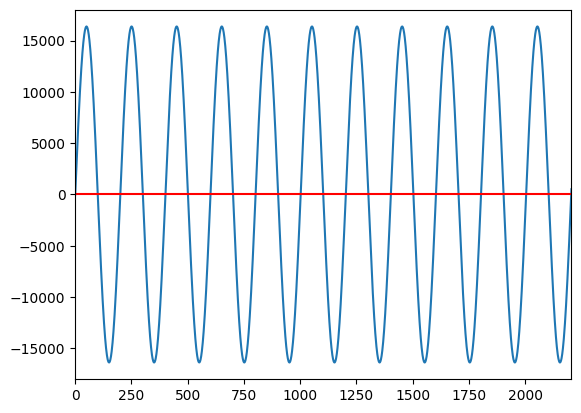

In [189]:
summa = oscilator(220, 0.5)

wavfile.write("sin_wave.wav", SAMPLING_RATE, summa)
display(Audio('sin_wave.wav'))
plot_signal(summa)
plt.show()

#### Генерація суми 2 синусоїд частотами 110 та 330 Герц

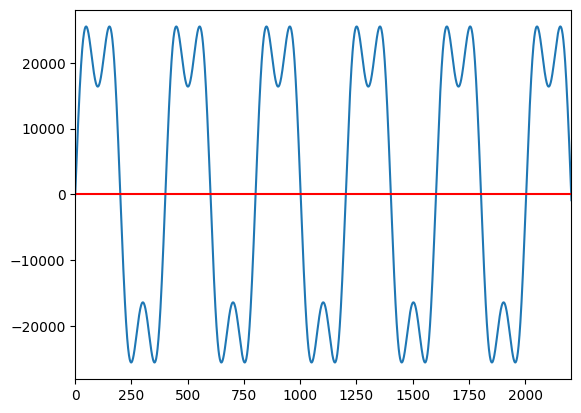

In [190]:
summa = oscilator(110, 0.8) + oscilator(330, 0.3) #+ oscilator(550, 0.3) + oscilator(770, 0.3)

wavfile.write("110_and_330.wav", SAMPLING_RATE, summa)
display(Audio('110_and_330.wav'))
plot_signal(summa)
plt.show()

#### Генерація квадратної хвилі

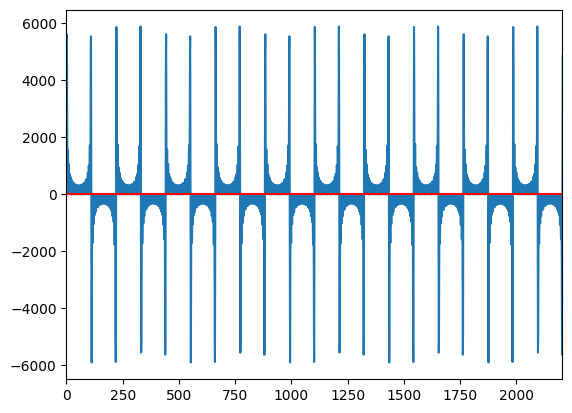

In [191]:
summa = np.sum(([oscilator(freq*i, 0.01) for i in range(1, 50, 2)]), axis=(0), dtype=np.int16)

wavfile.write("square_wave.wav", SAMPLING_RATE, summa)
display(Audio('square_wave.wav'))
plot_signal(summa)
plt.show()

#### Генерація пилоподібної хвилі

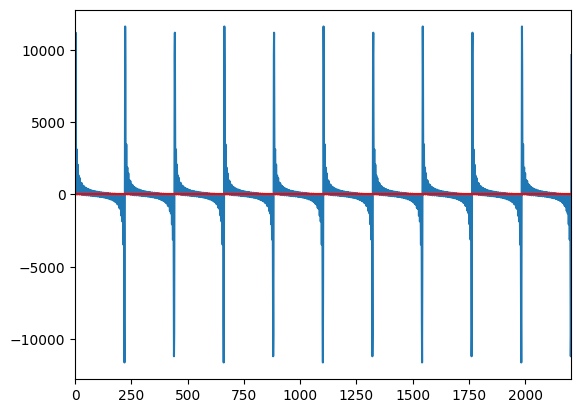

In [192]:
summa = np.sum(([oscilator(freq*i, 0.01) for i in range(1, 50)]), axis=(0), dtype=np.int16)

wavfile.write("sawtooth_wave.wav", SAMPLING_RATE, summa)
display(Audio('sawtooth_wave.wav'))
plot_signal(summa)
plt.show()

#### Генерація тризвуку як суми 3 синусоїд

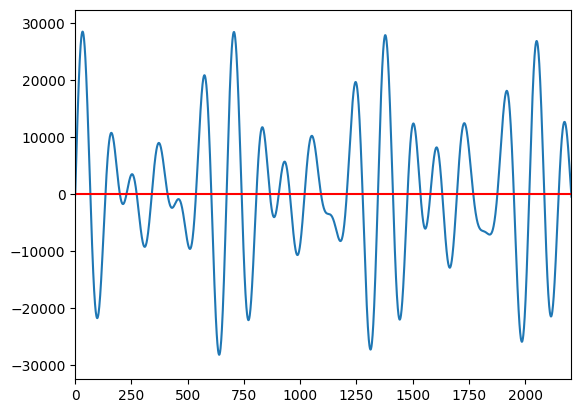

In [194]:
summa = oscilator(261.63, 0.3) + oscilator(329.63, 0.3) + oscilator(392.00, 0.3)

wavfile.write("triad.wav", SAMPLING_RATE, summa)
display(Audio('triad.wav'))
plot_signal(summa)
plt.show()